# Author: George Appiah Sarfo
#Desc: Stock Analysis to decide which stocks to add to portfolio
#Date: 2019/08/01/


In [329]:
import requests
import sys
import pandas as pd
import io
from io import StringIO
from pandas.io.json import json_normalize 
import numpy as np
#import fbprophet
#from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
 
plt.rcParams['figure.figsize']=(60,30)
plt.style.use('ggplot')

    
#df



CVX profitability returns: -0.05%
AAPL profitability returns: -0.59%
AMZN profitability returns: 0.15%

{'stock': 'CVX', 'ARIMA': (0, 1, 0), 'prediction_accuracy': 0.9827, 'aic': 523.215, 'profitability': 'Not Profitable Now', 'Current Stock Price': 77.44, 'Predicted Stock Price in 30 days': 77.4001}

{'stock': 'AAPL', 'ARIMA': (0, 1, 0), 'prediction_accuracy': 0.9461, 'aic': 437.406, 'profitability': 'Not Profitable Now', 'Current Stock Price': 19.62, 'Predicted Stock Price in 30 days': 19.505}

{'stock': 'AMZN', 'ARIMA': (0, 1, 1), 'prediction_accuracy': 0.9647, 'aic': 985.725, 'profitability': 'Profitable Now', 'Current Stock Price': 61.75, 'Predicted Stock Price in 30 days': 61.8427}


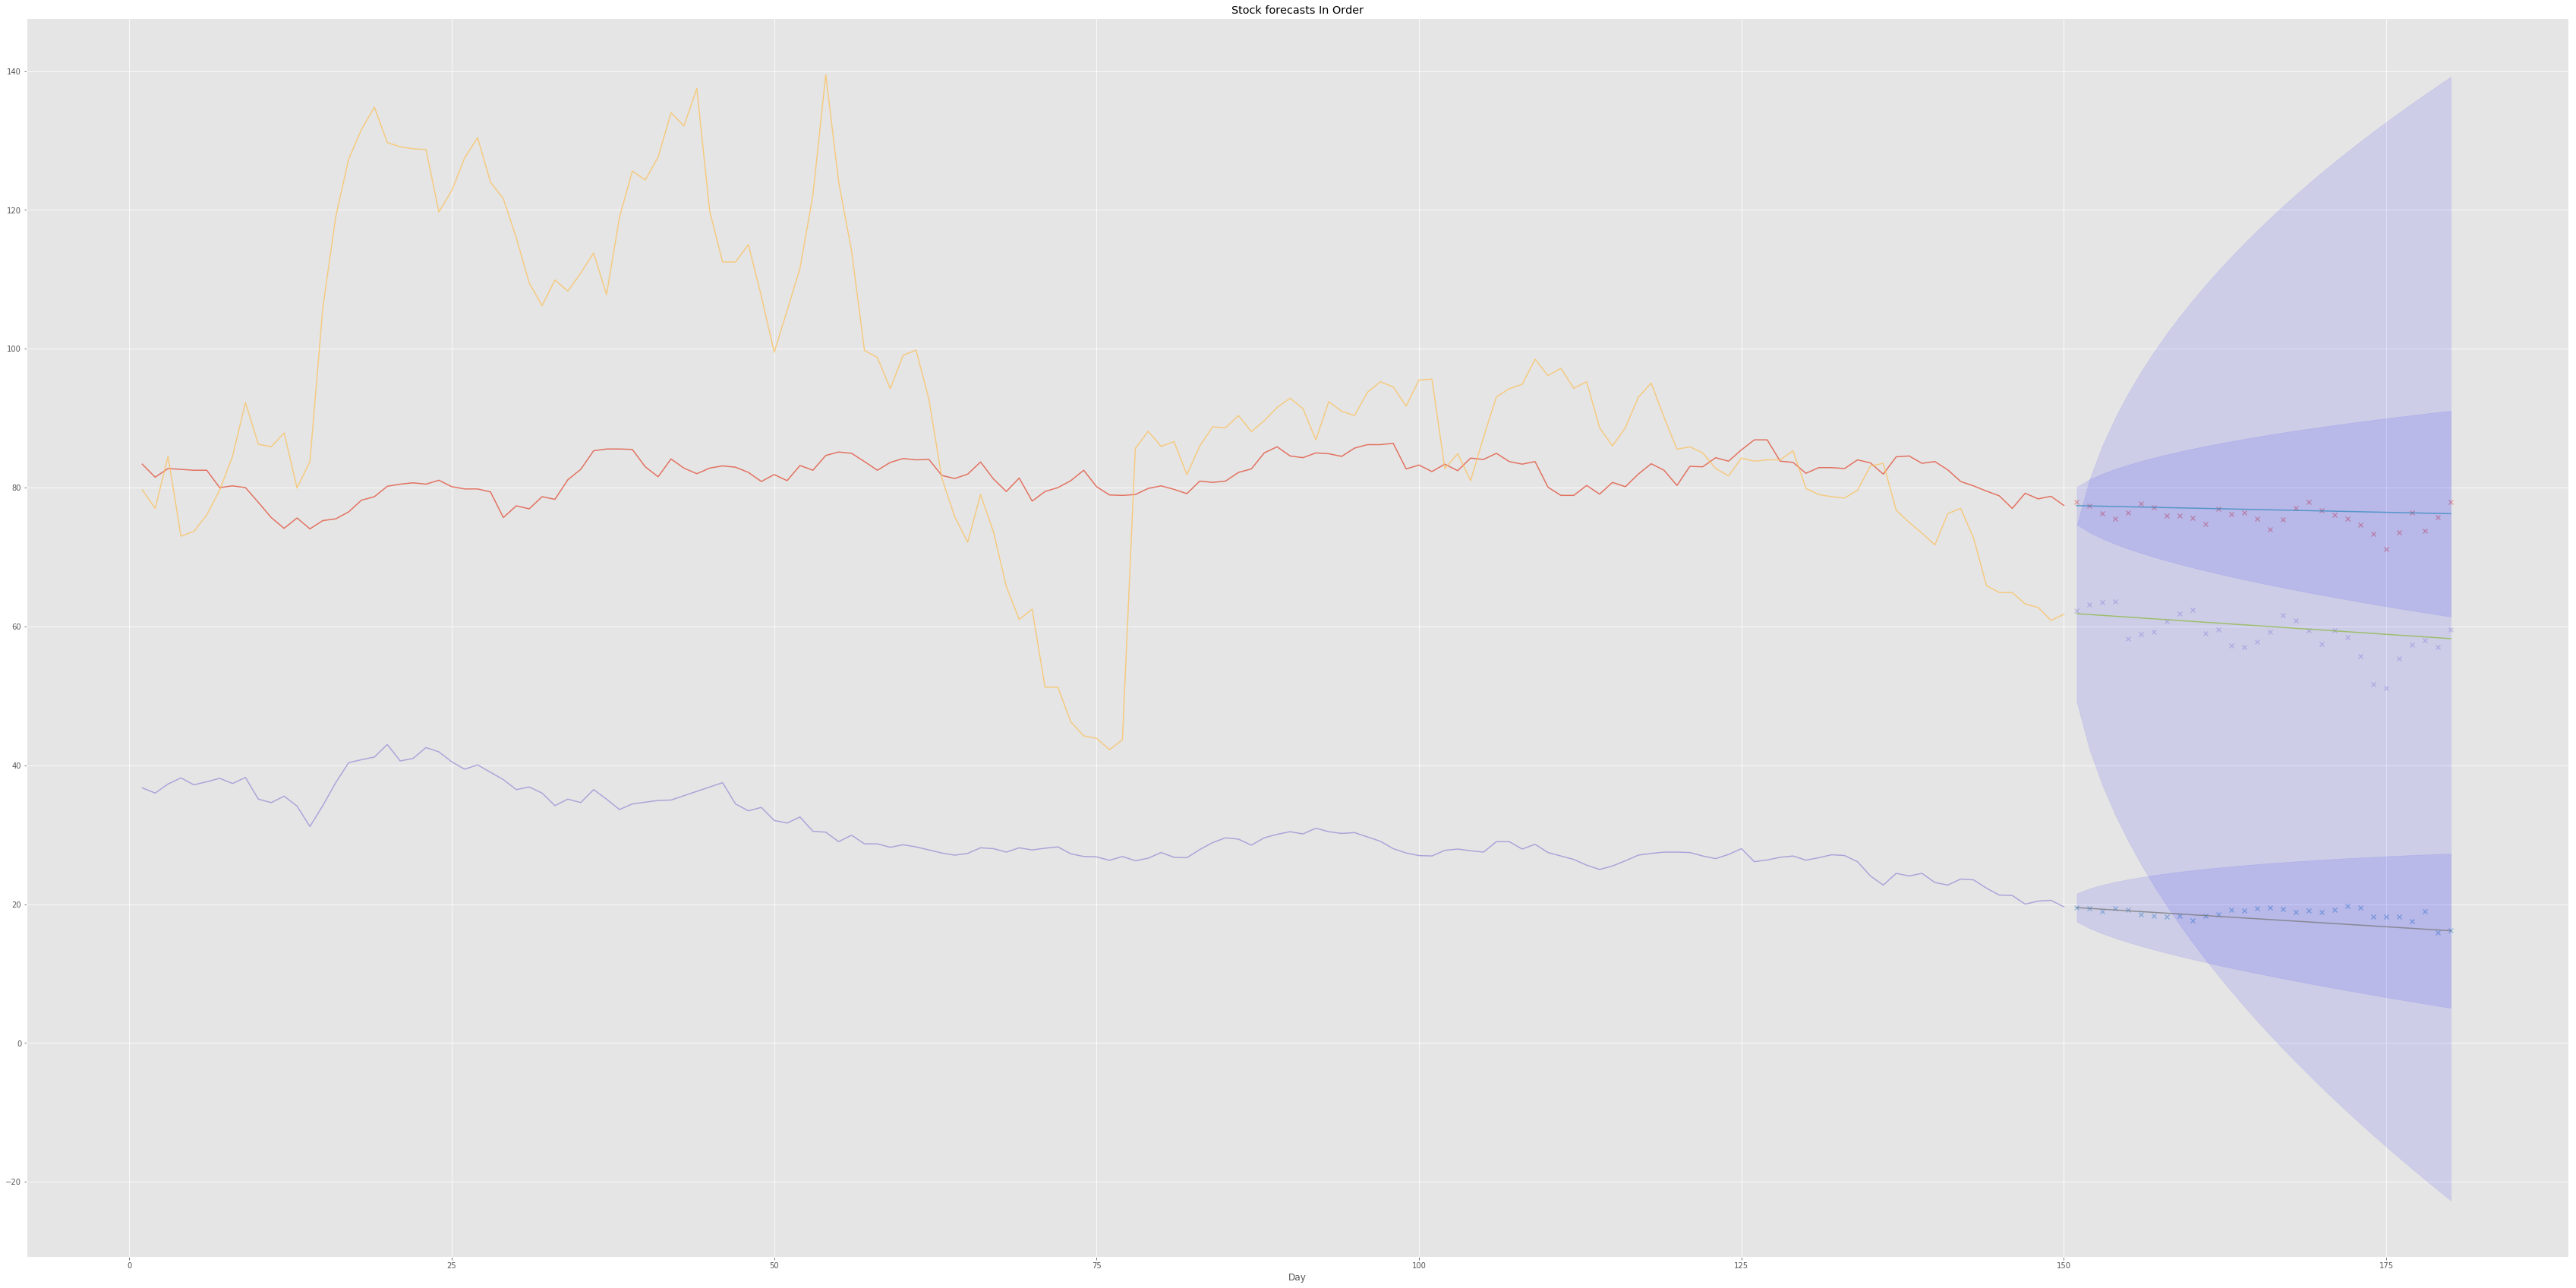

In [354]:
#Input the correct stock codes for the stock_list variable

vantage_url="https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={}&apikey=E16P4G8BMDE2VDAN&outputsize=full&datatype=csv"

stock_list = ['CVX', 'AAPL', 'AMZN']   #'JNJ', 'IBM', 'CVX', 'GE', 'WMT', 'MSFT']

data_all = [] #initialize and array

for sl in stock_list: #For Each stock in the stock_list
    
    response = requests.get(vantage_url.format(sl)) #Get the dataset from alpha vantage api
    data=(response.content)
    df=pd.read_csv(io.StringIO(data.decode('utf-8'))) #Prepare the resultset
    
    sorted_closing=df.sort_values(by='timestamp') #Sort from past to present based on timestamp
    closing_price_data=df.close
    
    #call the stock_analysis module, stock_analysis module performs the model selection and predictions
    #Get Resultset into an array and display
    data_all.append(stock_analysis(closing_price_data, sl)) 
    #print(df.close)
    
#print the dataset    
for i in data_all:
    print('')
    print(i)

    

In [251]:
#Uncomment to get more graphs on series

#model.plot_diagnostics(figsize=(7,6))
#plt.show()

In [353]:
print(__doc__)

# Author: Taylor Smith <taylor.smith@alkaline-ml.com>

import pmdarima as pm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

#Main module for stock analysis, modify for use as needed

def stock_analysis(dataset, stock_code):
    # #############################################################################
    # Load the data and split it into separate pieces training and test for in-data prediction
    # Use the last 180 days data to forecast/predict
    
    data = dataset.tail(180)
    train, test = data.head(150), data.tail(30)
    
    # Fit a simple auto_arima model
    modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

    # Create predictions for the future, evaluate on test
    preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

    # Uncomment to Print the error and forecast if needed:
    #print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

    #print("predicted values")

    preds_df=pd.DataFrame(preds)

    #print(preds_df[preds_df.columns[0]])


    #print(modl.summary()) #Uncomment to see detailed results
    
    # #############################################################################
    # Plot the points and the forecasts
    x_axis = np.arange(train.shape[0] + preds.shape[0])
    x_years = x_axis + 1  # Day starts at 1

    plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
    plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
    plt.scatter(x_years[x_axis[train.shape[0]:]], test,
                alpha=0.4, marker='x')  # Test data
    plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.1, color='b')
    plt.title("Stock forecasts In Order")
    plt.xlabel("Day")
    


    #Get The Model Parameters

    modl_aic=modl.aic()

    modl_bic=modl.bic

    mape = np.mean(np.abs(preds- test.values)/np.abs(test.values))  # MAPE

   
    #Get prediction accuracy
    
    acc=1-mape
    
   
    current_stock_price=train.tail(1).values[0]
    
    #print(current_stock_price.values[0])

    the_30th_day_predicted_stock_price=preds[0]
    
    prof=(the_30th_day_predicted_stock_price-current_stock_price)/current_stock_price
    
    print(stock_code+ ' profitability returns: '+str(round(100*prof, 2)) + '%')
    

    if prof < 0:
        profit='Not Profitable Now'
        
    if prof > 0:
        profit='Profitable Now'
    
    return({'stock': stock_code, 'ARIMA' : modl.order, 
            'prediction_accuracy':round(acc,4), 'aic': round(modl_aic,3), 
            'profitability': profit, 'Current Stock Price' : round(current_stock_price, 4), 
            'Predicted Stock Price in 30 days' : round(the_30th_day_predicted_stock_price,4)})
            
            #You can add these metrics below if you wish
            
            #'me':me, 'mae': mae, 
            #'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            #'corr':corr, 'minmax':minmax})

    #forecast_accuracy(preds, test.values)



Automatically created module for IPython interactive environment


In [198]:

#Uncomment to Print out predicted and actuals

#preds_df=pd.DataFrame(preds)

#preds_col=preds_df[preds_df.columns[0]]

#print("predicted data")

#print(preds_col)
#print('')
#print("test data")

#print(test)



In [199]:
#Function to get Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(preds-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(preds, test.values)




{'mape': 0.012204543248357031,
 'me': 0.3639438202247348,
 'mae': 1.4134269662921426,
 'mpe': 0.0033903681366904866,
 'rmse': 1.6751282310108493,
 'acf1': 0.48500700383728185,
 'corr': 0.8922769353039333,
 'minmax': 0.012072586124706297}